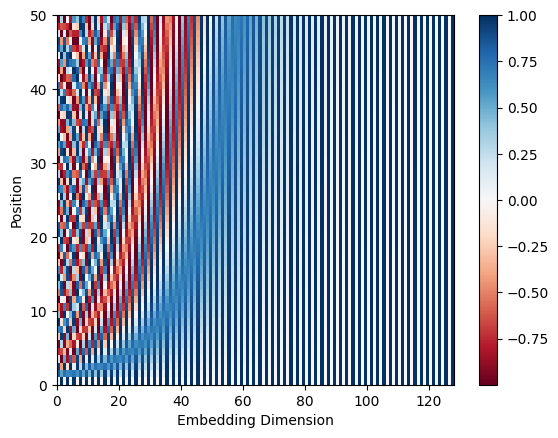

In [2]:
### 위치 인코딩

import math
import torch
from torch import nn
from matplotlib import pyplot as plt


class PositionalEncoding(nn.Module):
    def __init__(self, d_model, max_len, dropout=0.1):
        super().__init__()
        self.dropout = nn.Dropout(p=dropout)

        # pos: 입력 시퀀스에서 해당 단어의 위치
        position = torch.arange(max_len).unsqueeze(1)
        div_term = torch.exp(           
            # 임베딩 벡터의 차원 인덱스         # log에 - 붙였으므로 분모 분자 switch
            torch.arange(0, d_model, 2) * (-math.log(10000.0) / d_model)
        )

        pe = torch.zeros(max_len, 1, d_model)   # [최대 시퀀스, 1, 입력임베딩 차원] = [50, 1, 128]
        pe[:, 0, 0::2] = torch.sin(position * div_term)
        pe[:, 0, 1::2] = torch.cos(position * div_term)
        # 모델이 pe(위치 인코딩)을 매번 계산하지 않고 필요할 때 바로 사용하기 위해, 매개변수를 갱신하지 않도록 설정
        self.register_buffer("pe", pe)

    def forward(self, x):
        x = x + self.pe[: x.size(0)]    # x의 시퀀스길이 만큼 위치 인코딩 가져와 추가
        return self.dropout(x)


encoding = PositionalEncoding(d_model=128, max_len=50)
# input: d_model(임베딩 차원), max_len(최대 시퀀스)

plt.pcolormesh(encoding.pe.numpy().squeeze(), cmap="RdBu")
plt.xlabel("Embedding Dimension")
plt.xlim((0, 128))
plt.ylabel("Position")
plt.colorbar()
plt.show()

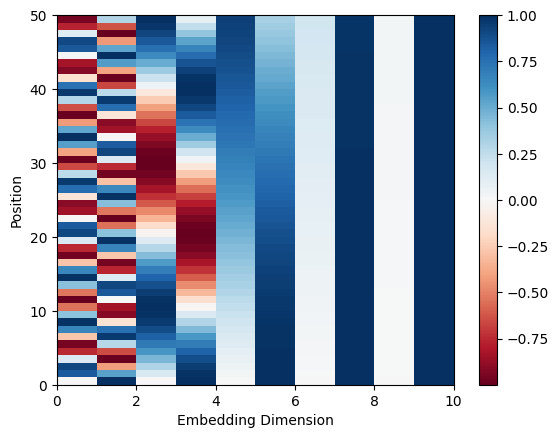

In [3]:
encoding = PositionalEncoding(d_model=10, max_len=50)
# input: d_model(임베딩 차원), max_len(최대 시퀀스)

plt.pcolormesh(encoding.pe.numpy().squeeze(), cmap="RdBu")
plt.xlabel("Embedding Dimension")
plt.xlim((0, 10))
plt.ylabel("Position")
plt.colorbar()
plt.show()